## Initial EDA

load in the data and first look at our target variable


In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [12]:
#df = pd.read_excel('Full_Datav5.xlsx', header=0)
df = pd.read_csv('Full_Datav5.csv', header=0)

df.columns = df.iloc[0,:]


y = df.Y

df.head()

AttributeError: 'DataFrame' object has no attribute 'Y'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null object
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null object
PAY_0        30000 non-null object
PAY_2        30000 non-null object
PAY_3        30000 non-null object
PAY_4        30000 non-null object
PAY_5        30000 non-null object
PAY_6        30000 non-null object
BILL_AMT1    30000 non-null object
BILL_AMT2    30000 non-null object
BILL_AMT3    30000 non-null object
BILL_AMT4    30000 non-null object
BILL_AMT5    30000 non-null object
BILL_AMT6    30000 non-null object
PAY_AMT1     30000 non-null object
PAY_AMT2     30000 non-null object
PAY_AMT3     30000 non-null object
PAY_AMT4     30000 non-null object
PAY_AMT5     30000 non-null object
PAY_AMT6     30000 non-null object
Y            30000 non-null object
dtypes: object(24)
memory usage: 5.7+ MB


Since every column is an object, we'll have to convert them to a numeric type. We'll use the data dictionary from UCI Machine Learning Repository website as a preliminary data dictionary to guide us.

From the UCI Machine Learning Repository website:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1 (LIMIT_BIL): Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2 (SEX): (1 = male; 2 = female). 
- X3 (EDUCATION): (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4 (MARITAL STATUS): (1 = married; 2 = single; 3 = others). 
- X5 (AGE): (year). 
- X6 - X11 (PAY_0 : PAY_6): History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17 (BILL_AMT1 : BILL_AMT6): Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23 (PAY_AMT1 : PAY_AMT6): Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- Y: Made a default payment (Yes = 1, No = 0)

All of these columns should be columns should be numeric, so let's convert it all to numeric

In [5]:
df = df.astype('float32')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null float32
SEX          30000 non-null float32
EDUCATION    30000 non-null float32
MARRIAGE     30000 non-null float32
AGE          30000 non-null float32
PAY_0        30000 non-null float32
PAY_2        30000 non-null float32
PAY_3        30000 non-null float32
PAY_4        30000 non-null float32
PAY_5        30000 non-null float32
PAY_6        30000 non-null float32
BILL_AMT1    30000 non-null float32
BILL_AMT2    30000 non-null float32
BILL_AMT3    30000 non-null float32
BILL_AMT4    30000 non-null float32
BILL_AMT5    30000 non-null float32
BILL_AMT6    30000 non-null float32
PAY_AMT1     30000 non-null float32
PAY_AMT2     30000 non-null float32
PAY_AMT3     30000 non-null float32
PAY_AMT4     30000 non-null float32
PAY_AMT5     30000 non-null float32
PAY_AMT6     30000 non-null float32
Y            30000 non-null float32
dtypes: float32(24)
memory usage

## Let's look at the target variable.

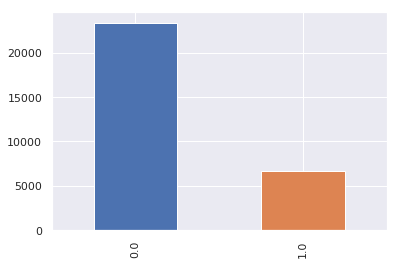

In [6]:
df.Y.value_counts().plot(kind='bar')

There is some inbalance here, so we need to note to do some sort of imbalance handling later in the pipeline.

Now let's look at some univariate plots to get a sense of what our features look like.

In [7]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Y'],
      dtype='object', name='ID')

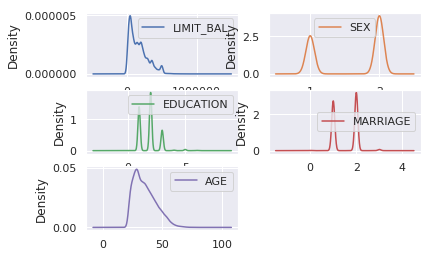

In [8]:
#create histograms for each variable
#we'll group some of the columns together to make plotting easier

df_group1 = df.iloc[:, 0:5]
df_group1.plot(kind='density', subplots=True, layout=(3,2), sharex=False)
plt.show()


#df.hist()
#plt.show()

Some notes: LIMIT_BAL and AGE are approaching a gaussian shape, but both are somewhat rightly skewed. Both sex and Marriage are bimodal (obviously), and Education is trimodal, with the three most common values of 1, 2, 3, and a tiny amount of 4, and 5. Besides LIMIT_BAL, nothing particular about these features. 

Next, we'll look at the Payment history. Since the values in these features are categorical in nature, we'll use bar plots.


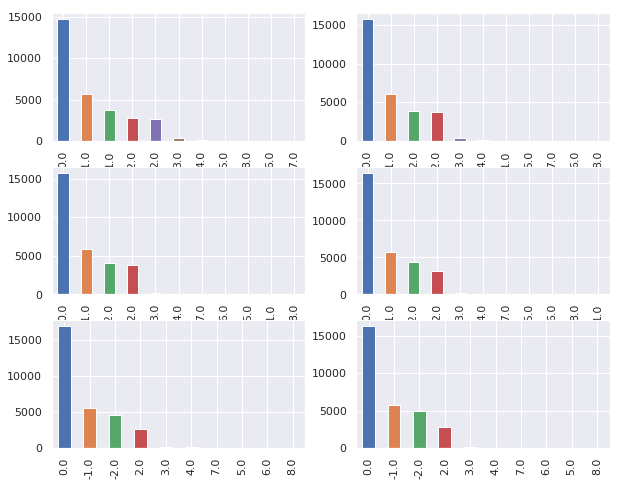

In [9]:
#create group
df_pay_hist = df.iloc[:,5:11]

fig, ax = plt.subplots(figsize = (10,8), sharex=True)


plt.subplot(3,2,1)
df['PAY_0'].value_counts().plot(kind='bar')

plt.subplot(3,2,2)
df['PAY_2'].value_counts().plot(kind='bar')

plt.subplot(3,2,3)
df['PAY_3'].value_counts().plot(kind='bar')

plt.subplot(3,2,4)
df['PAY_4'].value_counts().plot(kind='bar')

plt.subplot(3,2,5)
df['PAY_5'].value_counts().plot(kind='bar')

plt.subplot(3,2,6)
df['PAY_6'].value_counts().plot(kind='bar')





Some notes: all the plots are pretty much the same. Values of 0 are the most common by a large amount, i.e. another instance of some class inbalance. Will have to handle as well. 

Next, look at the Bill amounts.

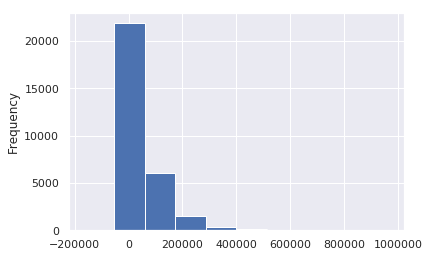

In [10]:
df['BILL_AMT1'].plot(kind='hist', )

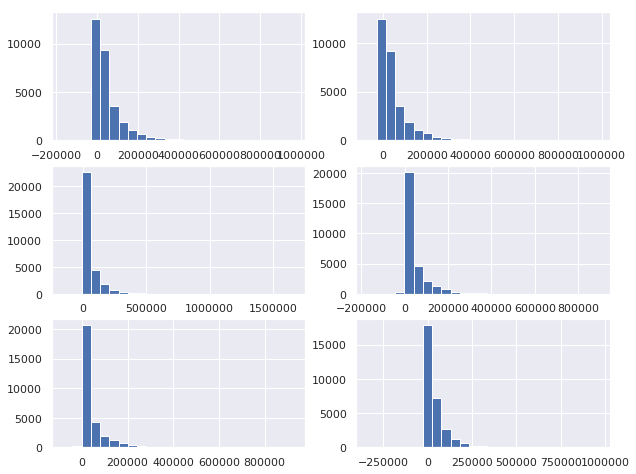

In [11]:
#create group
ax, fig = plt.subplots(figsize = (10,8))
bill_amts = df.iloc[:, 11:17]

plt.subplot(3,2,1)
bill_amts['BILL_AMT1'].hist(bins=25)

plt.subplot(3,2,2)
bill_amts['BILL_AMT2'].hist(bins=25)

plt.subplot(3,2,3)
bill_amts['BILL_AMT3'].hist(bins=25)

plt.subplot(3,2,4)
bill_amts['BILL_AMT4'].hist(bins=25)

plt.subplot(3,2,5)
bill_amts['BILL_AMT5'].hist(bins=25)

plt.subplot(3,2,6)
bill_amts['BILL_AMT6'].hist(bins=25)




In [12]:
# ds1 = pd.Series([PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6])
# ds2 = pd.Series([BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6])
# Outstanding_Bal = ds2 - ds1

# print(Outstanding_Bal)

In [13]:
# Load libraries

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [14]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns="Y")
y = df.Y

In [15]:
X

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
6,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,0.0,...,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0
7,500000.0,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,0.0,...,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0
8,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,0.0,...,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0
9,140000.0,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,0.0,...,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0
10,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,-1.0,...,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0


In [16]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [18]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7238888888888889


In [19]:
# created new column OUTSTANDING_BAL for each month

df["OUTSTANDING_BAL1"] = (df.BILL_AMT1 - df.PAY_AMT1)
df["OUTSTANDING_BAL2"] = (df.BILL_AMT2 - df.PAY_AMT2)
df["OUTSTANDING_BAL3"] = (df.BILL_AMT3 - df.PAY_AMT3)
df["OUTSTANDING_BAL4"] = (df.BILL_AMT4 - df.PAY_AMT4)
df["OUTSTANDING_BAL5"] = (df.BILL_AMT5 - df.PAY_AMT5)
df["OUTSTANDING_BAL6"] = (df.BILL_AMT6 - df.PAY_AMT6)

df.head(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y,OUTSTANDING_BAL1,OUTSTANDING_BAL2,OUTSTANDING_BAL3,OUTSTANDING_BAL4,OUTSTANDING_BAL5,OUTSTANDING_BAL6
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,1.0,3913.0,2413.0,689.0,0.0,0.0,0.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,1000.0,0.0,2000.0,1.0,2682.0,725.0,1682.0,2272.0,3455.0,1261.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1000.0,1000.0,5000.0,0.0,27721.0,12527.0,12559.0,13331.0,13948.0,10549.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1100.0,1069.0,1000.0,0.0,44990.0,46214.0,48091.0,27214.0,27890.0,28547.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,9000.0,689.0,679.0,0.0,6617.0,-31011.0,25835.0,11940.0,18457.0,18452.0


In [20]:
# created new column %_LIMIT_BAL for each month

df["%_LIMIT_BAL1"] = (df.OUTSTANDING_BAL1 / df.LIMIT_BAL)
df["%_LIMIT_BAL2"] = (df.OUTSTANDING_BAL2 / df.LIMIT_BAL)
df["%_LIMIT_BAL3"] = (df.OUTSTANDING_BAL3 / df.LIMIT_BAL)
df["%_LIMIT_BAL4"] = (df.OUTSTANDING_BAL4 / df.LIMIT_BAL)
df["%_LIMIT_BAL5"] = (df.OUTSTANDING_BAL5 / df.LIMIT_BAL)
df["%_LIMIT_BAL6"] = (df.OUTSTANDING_BAL6 / df.LIMIT_BAL)


df.head(5)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,OUTSTANDING_BAL3,OUTSTANDING_BAL4,OUTSTANDING_BAL5,OUTSTANDING_BAL6,%_LIMIT_BAL1,%_LIMIT_BAL2,%_LIMIT_BAL3,%_LIMIT_BAL4,%_LIMIT_BAL5,%_LIMIT_BAL6
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,689.0,0.0,0.0,0.0,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,1682.0,2272.0,3455.0,1261.0,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,12559.0,13331.0,13948.0,10549.0,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,48091.0,27214.0,27890.0,28547.0,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,25835.0,11940.0,18457.0,18452.0,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 36 columns):
LIMIT_BAL           30000 non-null float32
SEX                 30000 non-null float32
EDUCATION           30000 non-null float32
MARRIAGE            30000 non-null float32
AGE                 30000 non-null float32
PAY_0               30000 non-null float32
PAY_2               30000 non-null float32
PAY_3               30000 non-null float32
PAY_4               30000 non-null float32
PAY_5               30000 non-null float32
PAY_6               30000 non-null float32
BILL_AMT1           30000 non-null float32
BILL_AMT2           30000 non-null float32
BILL_AMT3           30000 non-null float32
BILL_AMT4           30000 non-null float32
BILL_AMT5           30000 non-null float32
BILL_AMT6           30000 non-null float32
PAY_AMT1            30000 non-null float32
PAY_AMT2            30000 non-null float32
PAY_AMT3            30000 non-null float32
PAY_AMT4            30000 non-null f

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns, class_names=['0','1']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('credit_card.png')
Image(graph.create_png())

In [22]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns=["BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6", "Y"])
y = df.Y

In [23]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'OUTSTANDING_BAL1',
       'OUTSTANDING_BAL2', 'OUTSTANDING_BAL3', 'OUTSTANDING_BAL4',
       'OUTSTANDING_BAL5', 'OUTSTANDING_BAL6', '%_LIMIT_BAL1', '%_LIMIT_BAL2',
       '%_LIMIT_BAL3', '%_LIMIT_BAL4', '%_LIMIT_BAL5', '%_LIMIT_BAL6'],
      dtype='object', name='ID')

In [24]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [28]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7185555555555555


In [29]:
# divided columns into two types of variables - target variable (y) and feature variables (X).
X = df.drop(columns=['PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'OUTSTANDING_BAL1',
       'OUTSTANDING_BAL2', 'OUTSTANDING_BAL3', 'OUTSTANDING_BAL4',
       'OUTSTANDING_BAL5', 'OUTSTANDING_BAL6', "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6", "Y"])
y = df.Y

In [30]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', '%_LIMIT_BAL1',
       '%_LIMIT_BAL2', '%_LIMIT_BAL3', '%_LIMIT_BAL4', '%_LIMIT_BAL5',
       '%_LIMIT_BAL6'],
      dtype='object', name='ID')

In [31]:
# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 


### Building Decision Tree Model
Let's create a Decision Tree Model using `DecisionTreeClassifier` provided in `Scikit-learn`.

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values (y_test) and predicted values (y_pred).

In [33]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.68


## Results
Creating calculated columns for Increasing outstanding balance per month column and Outstanding Bal had no meaningful effect and removing the repayment status, outstanding balance, bill amount lowered the accuracy by about a half percent
